In [43]:
import numpy as np
import pandas as pd
import h5py
import re
import sys
sys.path.insert(0, '/home/jbreda/Genome_sequence')
import genome_sequence
import matplotlib.pyplot as plt

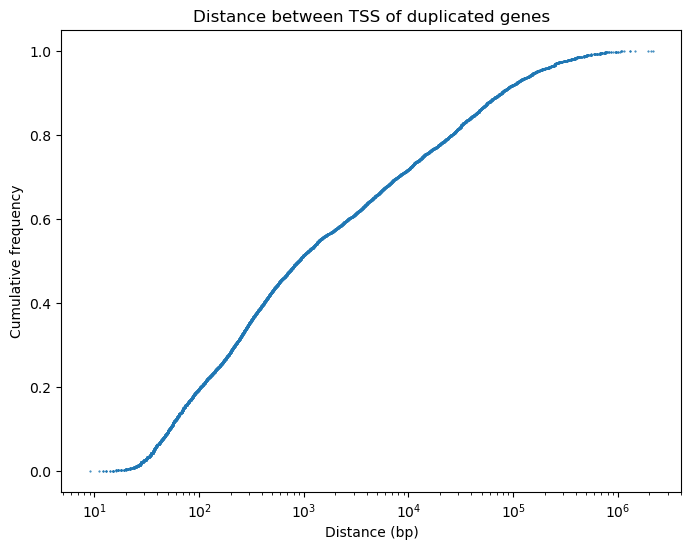

In [47]:
genome = 'mm10'
win_size_kb = 5

promoterome_infile = f"/home/jbreda/Promoterome/results/{genome}/promoterome_pm{win_size_kb}kb_filtered.bed"

Promoterome = pd.read_csv(promoterome_infile, sep='\t')
CHR = ['chr' + str(i) for i in range(1, 20)] + ['chrX', 'chrY']

D = []
for chr in CHR:
    # find duplicated genes names
    Promoterome_chr = Promoterome[Promoterome['chr'] == chr]
    duplicated_genes = Promoterome_chr[Promoterome_chr.duplicated(subset='gene', keep=False)]

    for g in duplicated_genes.gene.unique():
        idx = Promoterome_chr[Promoterome_chr['gene'] == g].index
        n = len(idx)

        for i in range(n-1):
            for j in range(i + 1, n):
                d = np.abs( (Promoterome_chr.loc[idx[i], 'start'] + Promoterome_chr.loc[idx[i], 'end']) / 2 - (Promoterome_chr.loc[idx[j], 'start'] + Promoterome_chr.loc[idx[j], 'end']) / 2)
                D.append(d)
D = np.sort(np.array(D))

fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(D, np.arange(1,len(D)+1)/len(D), '.', markersize=1)
ax.set_xlabel('Distance (bp)')
ax.set_ylabel('Cumulative frequency')
ax.set_title('Distance between TSS of duplicated genes')

ax.set_xscale('log')
#ax.set_yscale('log')